# Add Title

In [2]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import data_processing.load_sqlite as load_sql # My fetching functions from sqlite to panda dfs

In [3]:
with sqlite3.connect("../data/movies.db") as conn:
    cursor = conn.cursor()
    query = """SELECT * FROM movie_rating_features;"""
    df = pd.read_sql_query(query, conn)

In [4]:
df_genre = load_sql.fetch_one_hot_genres(vote_count_min=30)
df_genre.head()

,movie_id,Adventure,Fantasy,Animation,Drama,Horror,Action,Comedy,History,Western,Thriller,Crime,Documentary,Science Fiction,Mystery,Music,Romance,Family,War,TV Movie
0,2,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
4,11,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [5]:
df = pd.merge(df, df_genre, on='movie_id')
df.head()

,movie_id,vote_average,title,release_date,runtime,top_5_cast_ids,num_cast_members,director_ids,writer_ids,company_ids,...,Thriller,Crime,Documentary,Science Fiction,Mystery,Music,Romance,Family,War,TV Movie
0,2,7.113,Ariel,1988-10-21,73,None,0,None,None,2303,...,0,1,0,0,0,0,1,0,0,0
1,3,7.300,Shadows in Paradise,1986-10-17,74,None,0,None,None,2303,...,0,0,0,0,0,0,1,0,0,0
2,5,5.858,Four Rooms,1995-12-09,98,"3129,3130,3131,3124,2555",28,"138,2294,3110,3111","138,2294,3110,3111","14,59",...,0,0,0,0,0,0,0,0,0,0
3,6,6.500,Judgment Night,1993-10-15,109,"2880,9777,5724,10822,12799",31,2042,"52035,52035,1088307","33,182,1644",...,1,1,0,0,0,0,0,0,0,0
4,11,8.200,Star Wars,1977-05-25,121,"2,3,4,5,12248",104,1,1,"1,25",...,0,0,0,1,0,0,0,0,0,0


In [6]:
# Setting all the parameters
lambda_director   = 0.000408
lambda_writers    = 0.000377
lambda_cast_time  = 0.000592
lambda_cast_order = 0.122

In [7]:
df_scores = load_sql.fetch_scores(lambda_director, lambda_writers, lambda_cast_time, lambda_cast_order)
df_scores.head()

,movie_id,director_score,writer_score,cast_score,production_company_score
0,2,6.292700,6.292700,6.292700,6.687600
1,3,6.292700,6.292700,6.292700,6.512667
2,5,7.333995,7.355491,6.648418,6.302417
3,6,5.882887,6.119896,6.370170,6.375360
4,11,6.782933,6.676182,6.170755,6.623295


In [8]:
df = pd.merge(df, df_scores, on='movie_id')
df.head()

,movie_id,vote_average,title,release_date,runtime,top_5_cast_ids,num_cast_members,director_ids,writer_ids,company_ids,...,Mystery,Music,Romance,Family,War,TV Movie,director_score,writer_score,cast_score,production_company_score
0,2,7.113,Ariel,1988-10-21,73,None,0,None,None,2303,...,0,0,1,0,0,0,6.292700,6.292700,6.292700,6.687600
1,3,7.300,Shadows in Paradise,1986-10-17,74,None,0,None,None,2303,...,0,0,1,0,0,0,6.292700,6.292700,6.292700,6.512667
2,5,5.858,Four Rooms,1995-12-09,98,"3129,3130,3131,3124,2555",28,"138,2294,3110,3111","138,2294,3110,3111","14,59",...,0,0,0,0,0,0,7.333995,7.355491,6.648418,6.302417
3,6,6.500,Judgment Night,1993-10-15,109,"2880,9777,5724,10822,12799",31,2042,"52035,52035,1088307","33,182,1644",...,0,0,0,0,0,0,5.882887,6.119896,6.370170,6.375360
4,11,8.200,Star Wars,1977-05-25,121,"2,3,4,5,12248",104,1,1,"1,25",...,0,0,0,0,0,0,6.782933,6.676182,6.170755,6.623295


In [9]:
df.corr(numeric_only=True)["vote_average"].sort_values(ascending=False)

vote_average                1.000000
production_company_score    0.424627
cast_score                  0.337471
director_score              0.283437
writer_score                0.265273
Drama                       0.200607
Documentary                 0.176235
Animation                   0.169432
runtime                     0.117470
History                     0.105745
Music                       0.090760
num_cast_members            0.082879
War                         0.067184
movie_id                    0.065402
Family                      0.057172
Romance                     0.052283
Crime                       0.030522
Fantasy                     0.017024
Western                     0.008612
Adventure                   0.003832
TV Movie                   -0.001427
Mystery                    -0.017097
Comedy                     -0.050334
Action                     -0.078383
Science Fiction            -0.131807
Thriller                   -0.142446
Horror                     -0.311963
N

In [10]:
df.head()

,movie_id,vote_average,title,release_date,runtime,top_5_cast_ids,num_cast_members,director_ids,writer_ids,company_ids,...,Mystery,Music,Romance,Family,War,TV Movie,director_score,writer_score,cast_score,production_company_score
0,2,7.113,Ariel,1988-10-21,73,None,0,None,None,2303,...,0,0,1,0,0,0,6.292700,6.292700,6.292700,6.687600
1,3,7.300,Shadows in Paradise,1986-10-17,74,None,0,None,None,2303,...,0,0,1,0,0,0,6.292700,6.292700,6.292700,6.512667
2,5,5.858,Four Rooms,1995-12-09,98,"3129,3130,3131,3124,2555",28,"138,2294,3110,3111","138,2294,3110,3111","14,59",...,0,0,0,0,0,0,7.333995,7.355491,6.648418,6.302417
3,6,6.500,Judgment Night,1993-10-15,109,"2880,9777,5724,10822,12799",31,2042,"52035,52035,1088307","33,182,1644",...,0,0,0,0,0,0,5.882887,6.119896,6.370170,6.375360
4,11,8.200,Star Wars,1977-05-25,121,"2,3,4,5,12248",104,1,1,"1,25",...,0,0,0,0,0,0,6.782933,6.676182,6.170755,6.623295


In [11]:
def plot_score_correlations(df):
    """
    Plots the correlation of movie scores (director, writers, cast, production company) 
    vs. average vote rating over time, binned by year.
    
    Parameters:
        df_scores (pd.DataFrame): A DataFrame containing columns:
            ['release_date', 'vote_average', 'director_score', 'writer_score', 
             'cast_score', 'production_company_score']
    """
    df_scores = df[["release_date", "vote_average", "director_score",
                    "writer_score", "cast_score", "production_company_score"]].copy()

    df_scores["release_date"] = pd.to_datetime(df_scores["release_date"], errors='coerce')
    df_scores["release_year"] = df_scores["release_date"].dt.year.fillna(0).astype(int)

    
    # Group by year and compute correlations
    grouped = df_scores.groupby("release_year")[["vote_average", "director_score", "writer_score", "cast_score", "production_company_score"]]
    correlations = grouped.corr().reset_index()

    # Melt the dataframe for easier plotting
    correlations = correlations.melt(id_vars=["release_year"], var_name="Score Type", value_name="Correlation")

    # Filter only the relevant score correlations
    correlations = correlations[correlations["Score Type"].isin(
        ["director_score", "writer_score", "cast_score", "production_company_score"]
    )]

    # Plot using seaborn
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=correlations, x="release_year", y="Correlation", hue="Score Type", marker="o")

    plt.axhline(0, color="black", linestyle="--", alpha=0.7)  # Add a horizontal line at y=0 for reference
    plt.xlabel("Year")
    plt.ylabel("Correlation with Vote Average")
    plt.title("Correlation of Movie Scores vs. Vote Average Over Time")
    plt.legend(title="Score Type")
    plt.grid(True)
    plt.show()


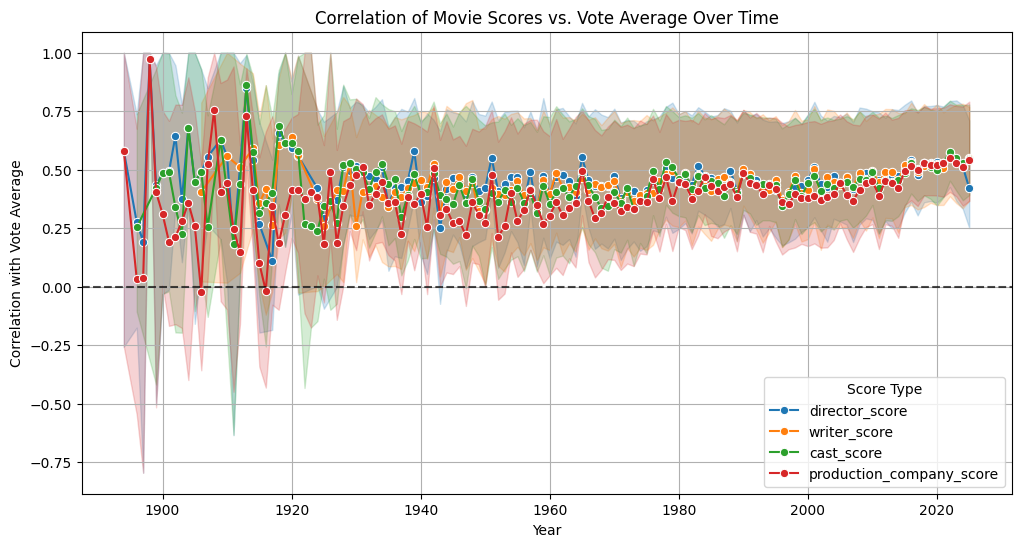

In [12]:
plot_score_correlations(df)

In [13]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date_numeric'] = df['release_date'].astype(int) / 10**9  # Unix timestamp in seconds

In [14]:
df_filtered = df[df['release_date'].dt.year >= 1978]

In [15]:
df_filtered.head()

,movie_id,vote_average,title,release_date,runtime,top_5_cast_ids,num_cast_members,director_ids,writer_ids,company_ids,...,Music,Romance,Family,War,TV Movie,director_score,writer_score,cast_score,production_company_score,release_date_numeric
0,2,7.113,Ariel,1988-10-21,73,None,0,None,None,2303,...,0,1,0,0,0,6.292700,6.292700,6.292700,6.687600,5.933952e+08
1,3,7.300,Shadows in Paradise,1986-10-17,74,None,0,None,None,2303,...,0,1,0,0,0,6.292700,6.292700,6.292700,6.512667,5.298912e+08
2,5,5.858,Four Rooms,1995-12-09,98,"3129,3130,3131,3124,2555",28,"138,2294,3110,3111","138,2294,3110,3111","14,59",...,0,0,0,0,0,7.333995,7.355491,6.648418,6.302417,8.184672e+08
3,6,6.500,Judgment Night,1993-10-15,109,"2880,9777,5724,10822,12799",31,2042,"52035,52035,1088307","33,182,1644",...,0,0,0,0,0,5.882887,6.119896,6.370170,6.375360,7.506432e+08
5,12,7.817,Finding Nemo,2003-05-30,100,"13,14,12,5293,118",68,"7,8","7,7,10,11,32535,1236458,1994647,2004922,2216342",3,...,0,0,1,0,0,7.538145,7.535726,6.351118,6.957385,1.054253e+09


In [16]:
df = df.select_dtypes(include=['number'])
df.columns

Index(['movie_id', 'vote_average', 'runtime', 'num_cast_members', 'Adventure',
       'Fantasy', 'Animation', 'Drama', 'Horror', 'Action', 'Comedy',
       'History', 'Western', 'Thriller', 'Crime', 'Documentary',
       'Science Fiction', 'Mystery', 'Music', 'Romance', 'Family', 'War',
       'TV Movie', 'director_score', 'writer_score', 'cast_score',
       'production_company_score', 'release_date_numeric'],
      dtype='object')

In [17]:
df_filtered = df_filtered.select_dtypes(include=['number'])
df_filtered.columns

Index(['movie_id', 'vote_average', 'runtime', 'num_cast_members', 'Adventure',
       'Fantasy', 'Animation', 'Drama', 'Horror', 'Action', 'Comedy',
       'History', 'Western', 'Thriller', 'Crime', 'Documentary',
       'Science Fiction', 'Mystery', 'Music', 'Romance', 'Family', 'War',
       'TV Movie', 'director_score', 'writer_score', 'cast_score',
       'production_company_score', 'release_date_numeric'],
      dtype='object')

## Models
### First, split the data for training and testing

In [18]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [19]:
# Define features (everything except 'vote_average')
X_train = train_df.drop(columns=['vote_average', 'movie_id'])
X_test = test_df.drop(columns=['vote_average', 'movie_id'])

# Define target
y_train = train_df['vote_average']
y_test = test_df['vote_average']

### Try Gradient Boosting. Results are poor:

In [104]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

0.44138526420674495
0.40195537138225035


### Random Forest looks more promising:

In [105]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Training score:", rf.score(X_train, y_train))
print("Testing score:", rf.score(X_test, y_test))

Training score: 0.9188990626257545
Testing score: 0.4066765482169392


### The Random Forest model above is overfitting. Let's try tuning the parameters:

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Create a RandomForestRegressor model with regularization
rf_model = RandomForestRegressor(
    n_estimators=100,               # Reduce number of estimators
    max_depth=20,                   # Limit tree depth
    min_samples_split=10,           # Require more samples to split
    min_samples_leaf=5,             # Require more samples for leaf nodes
    max_features='sqrt',            # Limit features for each split
    random_state=42                 # Set a seed for reproducibility
)

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

print(f"Cross-validation scores: {cross_val_scores}")
print(f"Average cross-validation score: {cross_val_scores.mean()}")

# Fit the final model
rf_model.fit(X_train, y_train)

# Evaluate on the test set
test_score = rf_model.score(X_test, y_test)
print(f"Test score: {test_score}")


Cross-validation scores: [0.45524716 0.44719737 0.42452231 0.43281626 0.44149891]
Average cross-validation score: 0.4402564030873057
Test score: 0.4253234078393969


In [107]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV  # Meta-model

# Define the base models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Define the meta-model (can be simple, like Ridge Regression)
meta_model = RidgeCV()

# Create the stacking ensemble
stacking_model = StackingRegressor(
    estimators=[('rf', rf), ('gb', gb)],  # Base models
    final_estimator=meta_model,           # Meta-model
    cv=5  # Cross-validation for training base models
)

# Train the ensemble
stacking_model.fit(X_train, y_train)

# Predict on test set
y_pred = stacking_model.predict(X_test)

# Evaluate performance
print("Train score:", stacking_model.score(X_train, y_train))
print(" Test score:", stacking_model.score(X_test, y_test))

Train score: 0.7387311958358183
 Test score: 0.4209165223662632


### Linear Regression: without genres

In [45]:
X_train.columns

Index(['runtime', 'num_cast_members', 'director_score', 'writers_score',
       'cast_score', 'production_company_score', 'Adventure', 'Fantasy',
       'Animation', 'Drama', 'Horror', 'Action', 'Comedy', 'History',
       'Western', 'Thriller', 'Crime', 'Documentary', 'Science Fiction',
       'Mystery', 'Music', 'Romance', 'Family', 'War', 'TV Movie',
       'release_date_numeric'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features:
features = ['director_score', 'writers_score', 'cast_score', 'production_company_score', 
            'release_date_numeric', 'runtime', 'num_cast_members']

X_train = train_df[features]
X_test = test_df[features]

# Define target
y_train = train_df['vote_average']
y_test = test_df['vote_average']

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print("Train score:", linreg.score(X_train, y_train))
print(" Test score:", linreg.score(X_test, y_test))

Train score: 0.3389801093604329
 Test score: 0.33521794166434093


In [ ]:
coefficients = pd.DataFrame(linreg.coef_, X_train.columns, columns=["Coefficient"])
print(coefficients)

                           Coefficient
director_score            1.670665e-01
writers_score             1.471176e-01
cast_score                4.589186e-01
production_company_score  5.416358e-01
release_date_numeric      8.420509e-11
runtime                   2.151325e-03
num_cast_members          2.211645e-03
